### python3のバージョンを確認

In [676]:
!which python3

64011.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/bin/python3


#### vestaでPOSCARを可視化

In [60]:
# import subprocess
# VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
# POSCAR = './POSCAR'
# myprocess = subprocess.Popen([VESTA, '-open', POSCAR])

### ASEでPOSCARファイルを可視化

In [677]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read("POSCAR")

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

### matplotlibでposcarファイルを描画

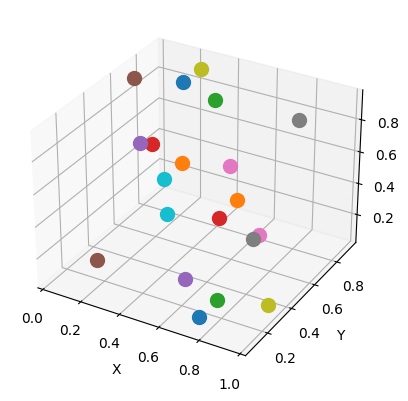

In [678]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# POSCARファイルから座標を読み込む関数
def read_poscar(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 座標データの始まりの行を見つける
    for i, line in enumerate(lines):
        if "Direct" in line or "Cartesian" in line:
            start_line = i + 1
            break

    # 座標データを取得
    coordinates = []
    for line in lines[start_line:]:
        coords = [float(coord) for coord in line.split()]
        coordinates.append(coords)

    return coordinates

# POSCARファイルのパス
poscar_file = 'POSCAR'

# 座標を読み込む
coordinates = read_poscar(poscar_file)

# 3Dプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 原子の座標をプロット
for coord in coordinates:
    x, y, z = coord
    ax.scatter(x, y, z, marker='o', s=100)

# グラフの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# グラフを表示
plt.show()


### POSCARファイルを.csvファイルに変換

In [88]:
import numpy as np
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 構造情報が始まる行を特定
    for i, line in enumerate(lines):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = []
    for line in lines[start_line:]:
        if line.strip() == '':
            break
        atom_data.append(line.strip().split())

    return atom_data

# CSVファイルに書き出し
def save_to_csv(data, output_filename):
    df = pd.DataFrame(data, columns=['x', 'y', 'z'])
    df.to_csv(output_filename, index=False)

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください
    output_csv_file = "structure.csv"  # CSVファイルの出力先を指定してください

    atom_data = read_POSCAR(poscar_file)
    save_to_csv(atom_data, output_csv_file)


### POSCARファイルをDataFrame形式に変換

In [89]:
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # POSCARファイルの各行をリストに格納
    poscar_data = [line.strip() for line in lines]

    return poscar_data

# POSCARデータをDataFrameに変換
def poscar_to_dataframe(poscar_data):
    # 構造情報が始まる行を特定
    for i, line in enumerate(poscar_data):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = poscar_data[start_line:]
    df = pd.DataFrame([line.split() for line in atom_data], columns=['x', 'y', 'z'])

    return df

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください

    poscar_data = read_POSCAR(poscar_file)
    dataframe = poscar_to_dataframe(poscar_data)

    # DataFrameを編集、処理、保存などを行うことができます
    # 例: データの表示
    print(dataframe)

    # 例: DataFrameをCSVファイルに保存
    dataframe.to_csv("edited_structure.csv", index=False)


                    x                  y                  z
0   0.250000000000000  0.757000000000000  0.919000000000000
1   0.250000000000000  0.743000000000000  0.419000000000000
2   0.750000000000000  0.243000000000000  0.081000000000000
3   0.750000000000000  0.257000000000000  0.581000000000000
4   0.250000000000000  0.416310000000000  0.754900000000000
5   0.250000000000000  0.083690000000000  0.254900000000000
6   0.750000000000000  0.583690000000000  0.245100000000000
7   0.750000000000000  0.916310000000000  0.745100000000000
8   0.250000000000000  0.901100000000000  0.912200000000000
9   0.250000000000000  0.598900000000000  0.412200000000000
10  0.750000000000000  0.098900000000000  0.087800000000000
11  0.750000000000000  0.401100000000000  0.587800000000000
12  0.459500000000000  0.683900000000000  0.921000000000000
13  0.040500000000000  0.816100000000000  0.421000000000000
14  0.540500000000000  0.316100000000000  0.079000000000000
15  0.040500000000000  0.683900000000000

### poscarファイルから元素種とその数を抽出し、PandasのSeriesとして出力する

In [635]:
import pandas as pd

# POSCARファイルを読み込む
with open('POSCAR', 'r') as file:
    poscar_data = file.readlines()

# 原子種とその数を含む行を抽出
element_species = poscar_data[5].split()
element_count = [int(s) for s in poscar_data[6].split()]

# # 原子種のリストと対応する数のリストを抽出
species_list = [elem for elem, count in zip(element_species, element_count) for _ in range(count)]

# # 原子種とその数からPandasのSeriesを作成
df_species = pd.DataFrame(species_list, columns=['Species'])

# # Seriesを表示
print(df_species)


   Species
0        C
1        C
2        C
3        C
4       Ba
5       Ba
6       Ba
7       Ba
8        O
9        O
10       O
11       O
12       O
13       O
14       O
15       O
16       O
17       O
18       O
19       O


In [636]:
df_coords = pd.merge(dataframe, df_species, left_index=True, right_index=True)
df_coords

,x,y,z,Species
0,0.250000000000000,0.757000000000000,0.919000000000000,C
1,0.250000000000000,0.743000000000000,0.419000000000000,C
2,0.750000000000000,0.243000000000000,0.081000000000000,C
3,0.750000000000000,0.257000000000000,0.581000000000000,C
4,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,0.750000000000000,0.916310000000000,0.745100000000000,Ba
8,0.250000000000000,0.901100000000000,0.912200000000000,O
9,0.250000000000000,0.598900000000000,0.412200000000000,O


In [637]:
species_list

['C',
 'C',
 'C',
 'C',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [638]:
counts = [4, 4, 12]
elements = ['C', 'Ba', 'O']

result = [elem for elem, count in zip(elements, counts) for _ in range(count)]

print(result)


['C', 'C', 'C', 'C', 'Ba', 'Ba', 'Ba', 'Ba', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [639]:
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # POSCARファイルの各行をリストに格納
    poscar_data = [line.strip() for line in lines]

    return poscar_data

# POSCARデータをDataFrameに変換
def poscar_to_dataframe(poscar_data):
    # 元素種を取得
    element_symbols = poscar_data[5].split()

    # 構造情報が始まる行を特定
    for i, line in enumerate(poscar_data):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = poscar_data[start_line:]
    data = []

    for line in atom_data:
        elements = line.split()
        x, y, z = map(float, elements[:3])
        data.append([element_symbols[elements[3]], x, y, z])

    df = pd.DataFrame(data, columns=['Element', 'x', 'y', 'z'])

    return df

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください

    poscar_data = read_POSCAR(poscar_file)
    dataframe = poscar_to_dataframe(poscar_data)

    # DataFrameを編集、処理、保存などを行うことができます
    # 例: データの表示
    print(dataframe)

    # 例: DataFrameをCSVファイルに保存
    # dataframe.to_csv("edited_structure.csv", index=False)


IndexError: list index out of range

In [640]:
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # POSCARファイルの各行をリストに格納
    poscar_data = [line.strip() for line in lines]

    return poscar_data

# POSCARデータをDataFrameに変換
def poscar_to_dataframe(poscar_data):
    # 元素種を取得
    element_symbols = poscar_data[5].split()

    # 構造情報が始まる行を特定
    for i, line in enumerate(poscar_data):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = poscar_data[start_line:]
    data = []

    for line in atom_data:
        elements = line.split()
        x, y, z = map(float, elements[:3])
        data.append([element_symbols[elements[3]], x, y, z])

    df = pd.DataFrame(data, columns=['Element', 'x', 'y', 'z'])

    return df

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください

    poscar_data = read_POSCAR(poscar_file)
    # dataframe = poscar_to_dataframe(poscar_data)

    # DataFrameを編集、処理、保存などを行うことができます
    # 例: データの表示
    # print(dataframe)

    # 例: DataFrameをCSVファイルに保存
    # dataframe.to_csv("edited_structure.csv", index=False)


In [782]:
# 元素種を取得
element_symbols = poscar_data[5].split()

# 構造情報が始まる行を特定
for i, line in enumerate(poscar_data):
    if 'Direct' in line or 'Cartesian' in line:
        start_line = i + 1
        break

# # 原子座標データを取得
atom_data = poscar_data[start_line:]
data = []

for line in atom_data:
    elements = line.split()
    x, y, z = map(float, elements[:3])
    data.append([element_symbols[elements[3]], x, y, z])

# df = pd.DataFrame(data, columns=['Element', 'x', 'y', 'z'])



IndexError: list index out of range

In [783]:
element_symbols

['C', 'Ba', 'O']

In [784]:
elements

['0.250000000000000', '0.757000000000000', '0.919000000000000']

In [785]:
elements[3]

IndexError: list index out of range

In [786]:
element_symbols[elements[3]]

IndexError: list index out of range

In [646]:
atom_data

['0.250000000000000   0.757000000000000   0.919000000000000',
 '0.250000000000000   0.743000000000000   0.419000000000000',
 '0.750000000000000   0.243000000000000   0.081000000000000',
 '0.750000000000000   0.257000000000000   0.581000000000000',
 '0.250000000000000   0.416310000000000   0.754900000000000',
 '0.250000000000000   0.083690000000000   0.254900000000000',
 '0.750000000000000   0.583690000000000   0.245100000000000',
 '0.750000000000000   0.916310000000000   0.745100000000000',
 '0.250000000000000   0.901100000000000   0.912200000000000',
 '0.250000000000000   0.598900000000000   0.412200000000000',
 '0.750000000000000   0.098900000000000   0.087800000000000',
 '0.750000000000000   0.401100000000000   0.587800000000000',
 '0.459500000000000   0.683900000000000   0.921000000000000',
 '0.040500000000000   0.816100000000000   0.421000000000000',
 '0.540500000000000   0.316100000000000   0.079000000000000',
 '0.040500000000000   0.683900000000000   0.921000000000000',
 '0.4595

In [647]:
poscar_data[5]

'C  Ba   O'

In [648]:
pd.DataFrame(poscar_data).iloc


### POSCARファイルをテキストファイルとして読み込み

In [649]:
POSCAR = 'POSCAR'
with open(POSCAR, mode="r") as f:
    print(f.read())

Generated by cif2cell 2.1.0. Ba C O3 :  de Villiers, J. P. R., American Mineralogist 56, 758-767 (1971).
   5.312600
  1.000000000000000   0.000000000000000   0.000000000000000
  0.000000000000000   1.674472009938636   0.000000000000000
  0.000000000000000   0.000000000000000   1.210028987689644
   C  Ba   O
   4   4  12
Direct
  0.250000000000000   0.757000000000000   0.919000000000000 
  0.250000000000000   0.743000000000000   0.419000000000000 
  0.750000000000000   0.243000000000000   0.081000000000000 
  0.750000000000000   0.257000000000000   0.581000000000000 
  0.250000000000000   0.416310000000000   0.754900000000000 
  0.250000000000000   0.083690000000000   0.254900000000000 
  0.750000000000000   0.583690000000000   0.245100000000000 
  0.750000000000000   0.916310000000000   0.745100000000000 
  0.250000000000000   0.901100000000000   0.912200000000000 
  0.250000000000000   0.598900000000000   0.412200000000000 
  0.750000000000000   0.098900000000000   0.087800000000000 

### POSCAR.nnlistファイルをテキストファイルとして読み込み

In [650]:
POSCAR_nnlist = 'POSCAR.nnlist'
with open(POSCAR_nnlist) as f:
    print(f.read())

      1     1    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      1     9    1.282630    0.000000   1.281885  -0.043713    0   0   0  C O
      1    13    1.289100    1.112990  -0.650283   0.012857    0   0   0  C O
      1    16    1.289100   -1.112990  -0.650283   0.012857    0   0   0  C O
      2     2    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      2    10    1.282630    0.000000  -1.281885  -0.043713    0   0   0  C O
      2    14    1.289100   -1.112990   0.650283   0.012857    0   0   0  C O
      2    17    1.289100    1.112990   0.650283   0.012857    0   0   0  C O
      3     3    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      3    11    1.282630    0.000000  -1.281885   0.043713    0   0   0  C O
      3    15    1.289100   -1.112990   0.650283  -0.012857    0   0   0  C O
      3    19    1.289100    1.112990   0.650283  -0.012857    0   0   0  C O
      4     4    0.000000    0.000000   0.000000   0.000000    0

In [651]:
POSCAR_nnlist = 'POSCAR.nnlist'
with open(POSCAR_nnlist) as f:
    print(f.readline())

      1     1    0.000000    0.000000   0.000000   0.000000    0   0   0  C C



### POSCAR.nnlistファイルを.csvファイルに変換

In [680]:
# テキストファイルの内容を読み込みます
with open(POSCAR_nnlist, 'r') as input_file:
    lines = input_file.readlines()

# CSVファイルに書き込むためのファイルを開きます
with open('POSCAR.nnlist.csv', 'w') as output_file:
    # CSVヘッダを書き込みます
    output_file.write("central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z,central species,neighboring species\n")
    
    # テキストファイルの各行を処理します
    for line in lines:
        # スペースで区切られた各要素を取得します
        elements = line.split()
        
        # CSV行を構築します
        csv_line = ','.join(elements[:11]) + '\n'
        
        # CSVファイルに書き込みます
        output_file.write(csv_line)


### POSCAR.nnlist.csvをDataFrameとして読み込む

In [681]:
import pandas as pd
df_nnlist = pd.read_csv('POSCAR.nnlist.csv')
df_nnlist

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z,central species,neighboring species
0,1,1,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
1,1,9,1.282630,0.000000,1.281885,-0.043713,0,0,0,C,O
2,1,13,1.289100,1.112990,-0.650283,0.012857,0,0,0,C,O
3,1,16,1.289100,-1.112990,-0.650283,0.012857,0,0,0,C,O
4,2,2,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
5,2,10,1.282630,0.000000,-1.281885,-0.043713,0,0,0,C,O
6,2,14,1.289100,-1.112990,0.650283,0.012857,0,0,0,C,O
7,2,17,1.289100,1.112990,0.650283,0.012857,0,0,0,C,O
8,3,3,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
9,3,11,1.282630,0.000000,-1.281885,0.043713,0,0,0,C,O


### df_nnlistの内、central speciesがO(酸素)のものを削除

In [682]:
df_nnlist_ex_O = df_nnlist[df_nnlist['central species'] != 'O']
df_nnlist_ex_O

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z,central species,neighboring species
0,1,1,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
1,1,9,1.282630,0.000000,1.281885,-0.043713,0,0,0,C,O
2,1,13,1.289100,1.112990,-0.650283,0.012857,0,0,0,C,O
3,1,16,1.289100,-1.112990,-0.650283,0.012857,0,0,0,C,O
4,2,2,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
5,2,10,1.282630,0.000000,-1.281885,-0.043713,0,0,0,C,O
6,2,14,1.289100,-1.112990,0.650283,0.012857,0,0,0,C,O
7,2,17,1.289100,1.112990,0.650283,0.012857,0,0,0,C,O
8,3,3,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
9,3,11,1.282630,0.000000,-1.281885,0.043713,0,0,0,C,O


### nnlistで得たクラスタの中心座標を計算し、DataFrameで返す

In [710]:
df_center_temp = df_nnlist_ex_O.groupby(by='central atom').mean()
df_center_temp = df_center_temp[['X', 'Y', 'Z']]
df_center_temp

/tmp/ipykernel_194020/2250191981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_center_temp = df_nnlist_ex_O.groupby(by='central atom').mean()


,X,Y,Z
central atom,,,
1,0.000000,-0.004670,-0.004500
2,0.000000,0.004670,-0.004500
3,0.000000,0.004670,0.004500
4,0.000000,-0.004670,0.004500
5,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000


### df_sum_xyzにspeciesを追加

In [711]:
# # 原子種のリストと対応する数のリストを抽出
element_species = poscar_data[5].split()
element_species_rm_O = element_species.remove('O')

In [712]:
species_list_rm_O = [elem for elem, count in zip(element_species, element_count) for _ in range(count)]

In [713]:
species_list_rm_O

['C', 'C', 'C', 'C', 'Ba', 'Ba', 'Ba', 'Ba']

In [714]:
# # 原子種とその数からPandasのSeriesを作成
df_species_rm_O = pd.DataFrame(species_list_rm_O, columns=['Species'])

In [715]:
# インデックスを1から始める
df_species_rm_O.index = range(1, len(df_species_rm_O) + 1)
df_species_rm_O

,Species
1,C
2,C
3,C
4,C
5,Ba
6,Ba
7,Ba
8,Ba


In [717]:
df_species_rm_O

,Species
1,C
2,C
3,C
4,C
5,Ba
6,Ba
7,Ba
8,Ba


In [718]:
df_center_temp = df_center_temp.merge(df_species_rm_O, right_index=True, left_index=True)
df_center_temp

,X,Y,Z,Species
central atom,,,,
1,0.000000,-0.004670,-0.004500,C
2,0.000000,0.004670,-0.004500,C
3,0.000000,0.004670,0.004500,C
4,0.000000,-0.004670,0.004500,C
5,0.000000,0.000000,0.000000,Ba
6,0.000000,0.000000,0.000000,Ba
7,0.000000,0.000000,0.000000,Ba
8,0.000000,0.000000,0.000000,Ba


In [724]:
df_center_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        8 non-null      float64
 1   Y        8 non-null      float64
 2   Z        8 non-null      float64
 3   Species  8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 620.0+ bytes


In [727]:
import pandas as pd

# サンプルのDataFrameを作成
data = {'Value': ['1.00000', '2.34567', '3.45678', '4.56789']}
df = pd.DataFrame(data)

# 文字列を小数に変換
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# データフレームを表示
print(df)


     Value
0 1.000000
1 2.345670
2 3.456780
3 4.567890


### 中心相対座標に、元の座標を追加

In [719]:
# 元の座標のうち、酸素Oを除いたもの
df_coords_org = df_coords[df_coords['Species'] != 'O']

# インデックスを1から始める
df_coords_org.index = range(1, len(df_coords_org) + 1)
df_coords_org

,x,y,z,Species
1,0.250000000000000,0.757000000000000,0.919000000000000,C
2,0.250000000000000,0.743000000000000,0.419000000000000,C
3,0.750000000000000,0.243000000000000,0.081000000000000,C
4,0.750000000000000,0.257000000000000,0.581000000000000,C
5,0.250000000000000,0.416310000000000,0.754900000000000,Ba
6,0.250000000000000,0.083690000000000,0.254900000000000,Ba
7,0.750000000000000,0.583690000000000,0.245100000000000,Ba
8,0.750000000000000,0.916310000000000,0.745100000000000,Ba


In [725]:
df_coords_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x        8 non-null      object
 1   y        8 non-null      object
 2   z        8 non-null      object
 3   Species  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [735]:
# 文字列を小数に変換
df_coords_org['x'] = pd.to_numeric(df_coords_org['x'], errors='coerce')
df_coords_org['y'] = pd.to_numeric(df_coords_org['y'], errors='coerce')
df_coords_org['z'] = pd.to_numeric(df_coords_org['z'], errors='coerce')

/tmp/ipykernel_194020/1189819352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords_org['x'] = pd.to_numeric(df_coords_org['x'], errors='coerce')
/tmp/ipykernel_194020/1189819352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords_org['y'] = pd.to_numeric(df_coords_org['y'], errors='coerce')
/tmp/ipykernel_194020/1189819352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [736]:
df_coords_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        8 non-null      float64
 1   y        8 non-null      float64
 2   z        8 non-null      float64
 3   Species  8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 388.0+ bytes


In [738]:
df_coords_x = df_coords_org['x'] + df_center_temp['X']

In [739]:
df_coords_y = df_coords_org['y'] + df_center_temp['Y']

In [740]:
df_coords_z = df_coords_org['z'] + df_center_temp['Z']

1     C
2     C
3     C
4     C
5    Ba
6    Ba
7    Ba
8    Ba
Name: Species, dtype: object

In [755]:
df_coords_fix = pd.concat([df_coords_x, df_coords_y, df_coords_z, df_species_rm_O['Species']], axis=1, keys=['X', 'Y', 'Z', 'Species'])
df_coords_fix

,X,Y,Z,Species
1,0.250000,0.752330,0.914500,C
2,0.250000,0.747670,0.414500,C
3,0.750000,0.247670,0.085500,C
4,0.750000,0.252330,0.585500,C
5,0.250000,0.416310,0.754900,Ba
6,0.250000,0.083690,0.254900,Ba
7,0.750000,0.583690,0.245100,Ba
8,0.750000,0.916310,0.745100,Ba


In [756]:
df_coords_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        8 non-null      float64
 1   Y        8 non-null      float64
 2   Z        8 non-null      float64
 3   Species  8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 388.0+ bytes


### df_sum_xyz_fixをPOSCARファイルに変換する

In [401]:
# df_sum_xyz_fix.to_csv('df_sum_xyz_fix.csv')

In [759]:
# speies_0 = df_coords_fix['Species'].unique()[0]
# speies_1 = df_coords_fix['Species'].unique()[1]
# num_C = len(df_coords_fix[df_coords_fix['Species'] == speies_0])
# num_Ba = len(df_coords_fix[df_coords_fix['Species'] == speies_1])

In [760]:
def return_species(df='df_coords_fix'):
    speies_0 = df['Species'].unique()[0]
    speies_1 = df['Species'].unique()[1]
    num_C = len(df[df['Species'] == speies_0])
    num_Ba = len(df[df['Species'] == speies_1])

    species_line = f"""   {speies_0}   {speies_1}
   {num_C}   {num_Ba}"""
    
    return species_line

In [761]:
return_species(df_coords_fix)

'   C   Ba\n   4   4'

In [450]:
# speies_line = f"""   {speies_0}   {speies_1}
#    {num_C}   {num_Ba}"""

# print(speies_line)

#### df_coords_fixをposcarのdirect以下の文字列に変換する

In [763]:
df_coords_fix

,X,Y,Z,Species
1,0.250000,0.752330,0.914500,C
2,0.250000,0.747670,0.414500,C
3,0.750000,0.247670,0.085500,C
4,0.750000,0.252330,0.585500,C
5,0.250000,0.416310,0.754900,Ba
6,0.250000,0.083690,0.254900,Ba
7,0.750000,0.583690,0.245100,Ba
8,0.750000,0.916310,0.745100,Ba


In [762]:
df_coords_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        8 non-null      float64
 1   Y        8 non-null      float64
 2   Z        8 non-null      float64
 3   Species  8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 388.0+ bytes


In [764]:
type(df_coords_fix.to_string)

method

In [765]:
print(df_coords_fix.to_string)

<bound method DataFrame.to_string of          X        Y        Z Species
1 0.250000 0.752330 0.914500       C
2 0.250000 0.747670 0.414500       C
3 0.750000 0.247670 0.085500       C
4 0.750000 0.252330 0.585500       C
5 0.250000 0.416310 0.754900      Ba
6 0.250000 0.083690 0.254900      Ba
7 0.750000 0.583690 0.245100      Ba
8 0.750000 0.916310 0.745100      Ba>


In [767]:
df_coords_fix_str = df_coords_fix[['X', 'Y', 'Z']].to_string(header=False, index=False, index_names=False)

In [768]:
df_coords_fix_str

'0.250000 0.752330 0.914500\n0.250000 0.747670 0.414500\n0.750000 0.247670 0.085500\n0.750000 0.252330 0.585500\n0.250000 0.416310 0.754900\n0.250000 0.083690 0.254900\n0.750000 0.583690 0.245100\n0.750000 0.916310 0.745100'

In [769]:
# text = '0.000000 -0.004670 -0.004500\n0.000000 0.004670 -0.004500\n'

# テキストファイルに書き込む
output_filename = 'tail_output.poscar'
with open(output_filename, 'w') as file:
    file.write(df_coords_fix_str)

    print(f"テキストファイル '{output_filename}' に書き込まれました。")


テキストファイル 'tail_output.poscar' に書き込まれました。


In [567]:
with open('POSCAR', 'r') as f:
    print(f.readline())

Generated by cif2cell 2.1.0. Ba C O3 :  de Villiers, J. P. R., American Mineralogist 56, 758-767 (1971).



In [770]:
# POSCARファイルのパス
poscar_file = 'POSCAR'

# テキストファイルに書き出すためのファイル名
output_file = 'head_output.poscar'

# POSCARファイルから元素種の行の前までを読み込み、テキストファイルに書き出す
with open(poscar_file, 'r') as poscar, open(output_file, 'w') as output:
    for line in poscar:
        if line.strip() == "C  Ba   O":
            # 元素種の行の前まで読み込み、ファイルに書き出す
            break
        output.write(line)

print(f"テキストファイル '{output_file}' に書き出しました。")


テキストファイル 'head_output.poscar' に書き出しました。


In [771]:
# すでに存在するテキストファイルに元素種を追記
with open(output_file, 'a') as file:
    file.write(return_species(df_coords_fix) + '\n')

print(f"テキストファイル '{output_file}' に追記しました。")


テキストファイル 'head_output.poscar' に追記しました。


In [772]:
# 元素種まで書かれたファイルにDirectという文字をを追記
with open(output_file, 'a') as file:
    file.write('Direct\n' )

print(f"テキストファイル '{output_file}' に追記しました。")

テキストファイル 'head_output.poscar' に追記しました。


In [778]:
# text = '0.000000 -0.004670 -0.004500\n0.000000 0.004670 -0.004500\n'

# テキストファイルに書き込む
with open(output_file, 'a') as file:
    file.write(df_coords_fix_str)

print(f"テキストファイル '{output_file}' に追記しました。")


テキストファイル 'head_output.poscar' に追記しました。


In [781]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read(output_file)

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

#### 編集したposcarファイルを読み込めるかのテスト

In [597]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read("sample.poscar")

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

In [592]:
import subprocess
VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
POSCAR = 'head_output.poscar'
myprocess = subprocess.Popen([VESTA, '-open', POSCAR])

In [551]:
df_sum_xyz_fix.to_string(header=False, index=False, index_names=False)

'0.000000 -0.004670 -0.004500  C\n0.000000  0.004670 -0.004500  C\n0.000000  0.004670  0.004500  C\n0.000000 -0.004670  0.004500  C\n0.000000  0.000000  0.000000 Ba\n0.000000  0.000000  0.000000 Ba\n0.000000  0.000000  0.000000 Ba\n0.000000  0.000000  0.000000 Ba'

In [525]:
df_sum_xyz_fix.apply(lambda row: "{}".format(row['X']), axis=1)

central atom
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
dtype: object

In [493]:
import pandas as pd

# サンプルDataFrameを作成
data = {
    'A': [1.23456789, 2.34567890, 3.45678901],
    'B': [10.0, 20.001, 30.00001]
}

df = pd.DataFrame(data)

# # 各要素を小数点以下の桁数を落とさずに文字列に変換
df = df.applymap(lambda x: f'{x:.10f}')

print(df)


         A         B
0 1.234568 10.000000
1 2.345679 20.001000
2 3.456789 30.000010


In [512]:
df_sum_xyz_fix_n = df_sum_xyz_fix.drop(columns='Speceis')
df_sum_xyz_fix_n

,X,Y,Z
central atom,,,
1,0.000000,-0.004670,-0.004500
2,0.000000,0.004670,-0.004500
3,0.000000,0.004670,0.004500
4,0.000000,-0.004670,0.004500
5,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000


In [429]:
# インデックスを1から始める
df_coords.index = range(1, len(df_coords) + 1)
df_coords

,x,y,z,Speceis
1,0.250000,0.757000,0.919000,C
2,0.250000,0.743000,0.419000,C
3,0.750000,0.243000,0.081000,C
4,0.750000,0.257000,0.581000,C
5,0.250000,0.416310,0.754900,Ba
6,0.250000,0.083690,0.254900,Ba
7,0.750000,0.583690,0.245100,Ba
8,0.750000,0.916310,0.745100,Ba
9,0.250000,0.901100,0.912200,O
10,0.250000,0.598900,0.412200,O


#### df_coordsのx,y,zカラムの要素をstr --> np.float64に変換する

In [430]:
# 10桁までの小数点以下の桁数を表示するように設定
# np.set_printoptions(precision=6)
# 表示オプションを設定
pd.options.display.float_format = '{:.6f}'.format
df_coords['x'] = df_coords['x'].astype(np.float64)
df_coords['y'] = df_coords['y'].astype(np.float64)
df_coords['z'] = df_coords['z'].astype(np.float64)

### 複数座標から中心座標を計算

In [432]:
# XYZ座標を格納するリスト
xyz_coordinates = []

# 与えられたXYZ座標データ
xyz_data = """
0.250000000000000   0.757000000000000   0.919000000000000
0.250000000000000   0.743000000000000   0.419000000000000
0.750000000000000   0.243000000000000   0.081000000000000
"""

# 改行文字で分割してXYZ座標をリストに格納
for line in xyz_data.strip().split('\n'):
    coordinates = [float(x) for x in line.split()]
    xyz_coordinates.append(coordinates)

# 中心座標を計算
center = [sum(coord[0] for coord in xyz_coordinates) / len(xyz_coordinates),
          sum(coord[1] for coord in xyz_coordinates) / len(xyz_coordinates),
          sum(coord[2] for coord in xyz_coordinates) / len(xyz_coordinates)]

# 結果を表示
print("中心座標:", center)


中心座標: [0.4166666666666667, 0.581, 0.47300000000000003]


In [433]:
# XYZ座標を格納するリスト
xyz_coordinates = []

# 与えられたXYZ座標データ
xyz_data = """

1.000000000000000   1.000000000000000   1.000000000000000
-1.000000000000000   -1.000000000000000   -1.000000000000000

"""

# 改行文字で分割してXYZ座標をリストに格納
for line in xyz_data.strip().split('\n'):
    coordinates = [float(x) for x in line.split()]
    xyz_coordinates.append(coordinates)

# 中心座標を計算
center = [sum(coord[0] for coord in xyz_coordinates) / len(xyz_coordinates),
          sum(coord[1] for coord in xyz_coordinates) / len(xyz_coordinates),
          sum(coord[2] for coord in xyz_coordinates) / len(xyz_coordinates)]

# 結果を表示
print("中心座標:", center)


中心座標: [0.0, 0.0, 0.0]


In [434]:
# 与えられたXYZ座標データ
xyz_data = """
0.250000000000000   0.757000000000000   0.919000000000000
0.250000000000000   0.743000000000000   0.419000000000000
0.750000000000000   0.243000000000000   0.081000000000000
"""

# 改行文字で分割してXYZ座標を取得
xyz_lines = xyz_data.strip().split('\n')

# XYZ座標を出力
for line in xyz_lines:
    print(line)


0.250000000000000   0.757000000000000   0.919000000000000
0.250000000000000   0.743000000000000   0.419000000000000
0.750000000000000   0.243000000000000   0.081000000000000


In [435]:
# 与えられたXYZ座標データ
xyz_data = """
0.250000000000000   0.757000000000000   0.919000000000000
0.250000000000000   0.743000000000000   0.419000000000000
0.750000000000000   0.243000000000000   0.081000000000000
"""

# 改行文字で分割してXYZ座標を取得し、数値のリストに変換
xyz_lines = xyz_data.strip().split('\n')
xyz_coordinates = []

for line in xyz_lines:
    coordinates = [float(coord) for coord in line.split()]
    xyz_coordinates.append(coordinates)

# 数値のリストとしてXYZ座標を出力
print("XYZ座標:")
for coordinates in xyz_coordinates:
    print(coordinates)


XYZ座標:
[0.25, 0.757, 0.919]
[0.25, 0.743, 0.419]
[0.75, 0.243, 0.081]


In [436]:
# POSCARファイルのパス
poscar_file_path = "POSCAR"

# POSCARファイルを読み込む
with open(poscar_file_path, 'r') as poscar_file:
    lines = poscar_file.readlines()

# 座標情報を格納するリスト
coordinates = []

# DirectまたはCartesianの座標モードを判定
if "Direct" in lines[7] or "Direct" in lines[8]:
    start_line = 8
else:
    start_line = 9

# 座標データを取り出し、数値のリストに変換
for line in lines[start_line:]:
    coords = [float(coord) for coord in line.split()]
    coordinates.append(coords)

# 結果を出力
print("座標:")
for coord in coordinates:
    print(coord)


座標:
[0.25, 0.757, 0.919]
[0.25, 0.743, 0.419]
[0.75, 0.243, 0.081]
[0.75, 0.257, 0.581]
[0.25, 0.41631, 0.7549]
[0.25, 0.08369, 0.2549]
[0.75, 0.58369, 0.2451]
[0.75, 0.91631, 0.7451]
[0.25, 0.9011, 0.9122]
[0.25, 0.5989, 0.4122]
[0.75, 0.0989, 0.0878]
[0.75, 0.4011, 0.5878]
[0.4595, 0.6839, 0.921]
[0.0405, 0.8161, 0.421]
[0.5405, 0.3161, 0.079]
[0.0405, 0.6839, 0.921]
[0.4595, 0.8161, 0.421]
[0.9595, 0.1839, 0.579]
[0.9595, 0.3161, 0.079]
[0.5405, 0.1839, 0.579]


In [437]:
type(coordinates)

list

In [438]:
len(coordinates)

20

In [439]:
# POSCARファイルのパス
poscar_file_path = "POSCAR"

# 新しいPOSCARファイルの出力パス
output_poscar_file_path = "output.POSCAR"

# POSCARファイルを読み込む
with open(poscar_file_path, 'r') as poscar_file:
    lines = poscar_file.readlines()

# DirectまたはCartesianの座標モードを判定
if "Direct" in lines[7] or "Direct" in lines[8]:
    start_line = 8
else:
    start_line = 9

# 座標データを取り出し、1つの原子にクラスタ化
clustered_coordinates = [lines[start_line].strip()]  # 最初の座標を代表としてクラスタ化

# 新しいPOSCARファイルを生成
with open(output_poscar_file_path, 'w') as output_poscar_file:
    for i, line in enumerate(lines):
        if start_line <= i < start_line + len(clustered_coordinates):
            # 座団化した座標を出力
            output_poscar_file.write(clustered_coordinates[0] + "\n")
        else:
            output_poscar_file.write(line)

# 結果を表示
print(f"隣接原子をクラスタ化し、新しいPOSCARファイル '{output_poscar_file_path}' を作成しました。")


隣接原子をクラスタ化し、新しいPOSCARファイル 'output.POSCAR' を作成しました。


In [440]:
from pymatgen.io.vasp import Poscar
from pymatgen.core import Structure
from pymatgen.analysis.structure_analyzer import VoronoiCoordFinder
from pymatgen.core import Element

# 距離以内の隣接原子を取得
def get_neighbors_within_distance(structure, atom_index, distance):
    neighbors = []
    for i, site in enumerate(structure):
        if i != atom_index and structure.get_distance(atom_index, i) <= distance:
            neighbors.append(i)
    return neighbors

# POSCARファイルのパス
poscar_file_path = "POSCAR"

# 新しいPOSCARファイルの出力パス
output_poscar_file_path = "output.POSCAR"

# 距離の閾値（この距離以内の原子がクラスタ化されます）
distance_threshold = 1.5  # 例: 1.5 Ångström

# POSCARファイルを読み込む
poscar = Poscar.from_file(poscar_file_path)

# Structureオブジェクトを取得
structure = poscar.structure

# VoronoiCoordFinderを使用して原子の近傍情報を取得
voro_finder = VoronoiCoordFinder(structure)

# 新しいStructureオブジェクトを作成
new_structure = Structure.from_sites([])

# 原子ごとに隣接原子をクラスタ化
for i, site in enumerate(structure):
    neighbors = get_neighbors_within_distance(structure, i, distance_threshold)
    if neighbors:
        # 隣接原子の中心座標を計算
        center = [0.0, 0.0, 0.0]
        for neighbor_index in neighbors:
            center = [center[j] + structure[neighbor_index].frac_coords[j] for j in range(3)]
        center = [coord / len(neighbors) for coord in center]

        # 新しいStructureオブジェクトにクラスタ化した原子を追加
        new_structure.append(Element("X"), center)

# 新しいPOSCARファイルを出力
new_poscar = Poscar(new_structure)
new_poscar.write_file(output_poscar_file_path)

print(f"隣接原子をクラスタ化し、新しいPOSCARファイル '{output_poscar_file_path}' を作成しました。")


ImportError: cannot import name 'VoronoiCoordFinder' from 'pymatgen.analysis.structure_analyzer' (/home/morii-k/.local/lib/python3.10/site-packages/pymatgen/analysis/structure_analyzer.py)

In [ ]:
from pymatgen.analysis.structure_analyzer import VoronoiCoordFinder

ImportError: cannot import name 'VoronoiCoordFinder' from 'pymatgen.analysis.structure_analyzer' (/home/morii-k/.local/lib/python3.10/site-packages/pymatgen/analysis/structure_analyzer.py)

In [ ]:
from pymatgen.io.vasp import Poscar
from pymatgen.analysis.structure_analyzer import VoronoiCoordFinder

# POSCARファイルのパス
poscar_file_path = "POSCAR"

# 新しいPOSCARファイルの出力パス
output_poscar_file_path = "output.POSCAR"

# 距離の閾値（この距離以内の原子がクラスタ化されます）
distance_threshold = 1.5  # 例: 1.5 Ångström

# POSCARファイルを読み込む
poscar = Poscar.from_file(poscar_file_path)

# VoronoiCoordFinderを使用して原子の近傍情報を取得
voro_finder = VoronoiCoordFinder(poscar.structure)

# 新しいStructureオブジェクトを作成
new_structure = poscar.structure.copy()

# 原子ごとに隣接原子をクラスタ化
for i, site in enumerate(new_structure):
    neighbors = voro_finder.get_coordination_number(i)
    if neighbors:
        # 隣接原子の中心座標を計算
        center = [0.0, 0.0, 0.0]
        for neighbor_site, _ in neighbors:
            center = [center[j] + neighbor_site.frac_coords[j] for j in range(3)]
        center = [coord / len(neighbors) for coord in center]

        # クラスタ化した原子の座標を中心座標に置き換え
        new_structure.replace(i, site.species_string, center)

# 新しいPOSCARファイルを出力
new_poscar = Poscar(new_structure)
new_poscar.write_file(output_poscar_file_path)

print(f"隣接原子をクラスタ化し、新しいPOSCARファイル '{output_poscar_file_path}' を作成しました。")


ImportError: cannot import name 'VoronoiCoordFinder' from 'pymatgen.analysis.structure_analyzer' (/home/morii-k/.local/lib/python3.10/site-packages/pymatgen/analysis/structure_analyzer.py)

### pymatgenでposcarをstuructureインスタンスとして読み込み、DataFrame化して、再度poscarに変換する

In [ ]:
from pymatgen.io.vasp import Poscar

poscar = Poscar.from_file('POSCAR')
poscar

Generated by cif2cell 2.1.0. Ba C O3 :  de Villiers, J. P. R., American Mineralogist 56, 758-767 (1971).
1.0
   5.3125999999999998    0.0000000000000000    0.0000000000000000
   0.0000000000000000    8.8957999999999977    0.0000000000000000
   0.0000000000000000    0.0000000000000000    6.4284000000000026
C Ba O
4 4 12
direct
   0.2500000000000000    0.7570000000000000    0.9190000000000000 C
   0.2500000000000000    0.7430000000000000    0.4190000000000000 C
   0.7500000000000000    0.2430000000000000    0.0810000000000000 C
   0.7500000000000000    0.2570000000000000    0.5810000000000000 C
   0.2500000000000000    0.4163100000000000    0.7549000000000000 Ba
   0.2500000000000000    0.0836900000000000    0.2549000000000000 Ba
   0.7500000000000000    0.5836900000000000    0.2451000000000000 Ba
   0.7500000000000000    0.9163100000000000    0.7451000000000000 Ba
   0.2500000000000000    0.9011000000000000    0.9122000000000000 O
   0.2500000000000000    0.5989000000000000    0.4122000

In [ ]:
type(Poscar.from_file('POSCAR'))

pymatgen.io.vasp.inputs.Poscar

In [ ]:
dir(Poscar.from_file('POSCAR'))

['REDIRECT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'as_dict',
 'comment',
 'from_dict',
 'from_file',
 'from_string',
 'get_string',
 'natoms',
 'predictor_corrector',
 'predictor_corrector_preamble',
 'selective_dynamics',
 'set_temperature',
 'site_symbols',
 'structure',
 'temperature',
 'to_json',
 'true_names',
 'unsafe_hash',
 'validate_monty',
 'velocities',
 'write_file']

In [ ]:
structure = poscar.structure

In [ ]:
type(structure)

pymatgen.core.structure.Structure

In [ ]:
dir(structure)

['DISTANCE_TOLERANCE',
 'REDIRECT',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_charge',
 '_get_neighbor_list_py',
 '_lattice',
 '_sites',
 'add_oxidation_state_by_element',
 'add_oxidation_state_by_guess',
 'add_oxidation_state_by_site',
 'add_site_property',
 'add_spin_by_element',
 'add_spin_by_site',
 'append',
 'apply_operation',
 'apply_strain',
 'as_dataframe',
 'as_dict',
 'atomic_numbers',
 'car

In [ ]:
structure.as_dataframe()

,Species,a,b,c,x,y,z
0,(C),0.2500,0.75700,0.9190,1.32815,6.734121,5.907700
1,(C),0.2500,0.74300,0.4190,1.32815,6.609579,2.693500
2,(C),0.7500,0.24300,0.0810,3.98445,2.161679,0.520700
3,(C),0.7500,0.25700,0.5810,3.98445,2.286221,3.734900
4,(Ba),0.2500,0.41631,0.7549,1.32815,3.703410,4.852799
5,(Ba),0.2500,0.08369,0.2549,1.32815,0.744490,1.638599
6,(Ba),0.7500,0.58369,0.2451,3.98445,5.192390,1.575601
7,(Ba),0.7500,0.91631,0.7451,3.98445,8.151310,4.789801
8,(O),0.2500,0.90110,0.9122,1.32815,8.016005,5.863986
9,(O),0.2500,0.59890,0.4122,1.32815,5.327695,2.649786


#### テスト：GPT

In [ ]:
from pymatgen.io.vasp import Poscar
import pandas as pd


# POSCARファイルの読み込み
poscar = Poscar.from_file("POSCAR")

# 粒子の数と元素のシンボルのリストを取得
num_atoms = poscar.natoms
element_symbols = poscar.site_symbols

# 原子座標のリストを取得
# atomic_positions = np.array(poscar.structure.frac_coords, dtype=np.float64)
atomic_positions = poscar.structure.frac_coords
# atomic_positions = poscar.structure.cart_coords

# データフレームを作成
data = {
    'X': [pos[0] for pos in atomic_positions],
    'Y': [pos[1] for pos in atomic_positions],
    'Z': [pos[2] for pos in atomic_positions],
    'Element': [elem for elem, count in zip(element_symbols, num_atoms) for _ in range(count)]
}

df = pd.DataFrame(data)

# # CSVファイルに保存
# df.to_csv("POSCAR.csv", index=False)


In [ ]:
# np.set_printoptions(precision=6)
atomic_positions

array([[0.25   , 0.757  , 0.919  ],
       [0.25   , 0.743  , 0.419  ],
       [0.75   , 0.243  , 0.081  ],
       [0.75   , 0.257  , 0.581  ],
       [0.25   , 0.41631, 0.7549 ],
       [0.25   , 0.08369, 0.2549 ],
       [0.75   , 0.58369, 0.2451 ],
       [0.75   , 0.91631, 0.7451 ],
       [0.25   , 0.9011 , 0.9122 ],
       [0.25   , 0.5989 , 0.4122 ],
       [0.75   , 0.0989 , 0.0878 ],
       [0.75   , 0.4011 , 0.5878 ],
       [0.4595 , 0.6839 , 0.921  ],
       [0.0405 , 0.8161 , 0.421  ],
       [0.5405 , 0.3161 , 0.079  ],
       [0.0405 , 0.6839 , 0.921  ],
       [0.4595 , 0.8161 , 0.421  ],
       [0.9595 , 0.1839 , 0.579  ],
       [0.9595 , 0.3161 , 0.079  ],
       [0.5405 , 0.1839 , 0.579  ]])

In [ ]:
# np.set_printoptions(precision=10)
type(poscar.structure.frac_coords)

numpy.ndarray

In [ ]:
help(poscar.structure.frac_coords)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [ ]:
df

,X,Y,Z,Element
0,0.2500,0.75700,0.9190,C
1,0.2500,0.74300,0.4190,C
2,0.7500,0.24300,0.0810,C
3,0.7500,0.25700,0.5810,C
4,0.2500,0.41631,0.7549,Ba
5,0.2500,0.08369,0.2549,Ba
6,0.7500,0.58369,0.2451,Ba
7,0.7500,0.91631,0.7451,Ba
8,0.2500,0.90110,0.9122,O
9,0.2500,0.59890,0.4122,O


In [ ]:
counts = [4, 4, 12]
elements = ['C', 'Ba', 'O']

result = [elem for elem, count in zip(elements, counts) for _ in range(count)]

print(result)


['C', 'C', 'C', 'C', 'Ba', 'Ba', 'Ba', 'Ba', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
num_atoms

[4, 4, 12]

In [ ]:
element_symbols

['C', 'Ba', 'O']

In [ ]:
species_list = [elem for elem, count in zip(element_symbols, num_atoms) for _ in range(count)]

print(species_list)


['C', 'C', 'C', 'C', 'Ba', 'Ba', 'Ba', 'Ba', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
